<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
    <b>CAPSTONE</b><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/>
    <b>GRUPO 3 - Modeling</b>
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

Después de la fase de EDA (Exploratory Data Analysis), nos quedamos con 32 de las 36 características iniciales:

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.

# 1. Preparación

En esta fase vamos a cargar y preparar el dataset resultante de la fase de EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use('ggplot')

RANDOM_SEED = 42    # Set a random seed for reproducibility!

In [112]:
def print_metrics(y_test, y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

In [113]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
)

Cargamos el dataset y exploramos su estructura y datos.

In [114]:
features_df = pd.read_csv('training_set_features_eda_notnulls.csv', index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


El dataset tiene 26707 filas y 48 columnas.

In [115]:
features_df.shape

(26707, 48)

Tipos de datos por columna:

In [116]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
age_group_0                    float64
age_group_1                    float64
age_group_2              

In [117]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.560265,0.439735,0.777998,0.222002,0.562512,0.383083,0.054405,0.436028,0.294455,0.269517
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.496364,0.496364,0.415600,0.415600,0.496086,0.486147,0.226820,0.495900,0.455806,0.443717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Split training y evaluation set

In [119]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.20,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
y_train_seasonal = y_train[['seasonal_vaccine']].copy()
y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

# 2. Hyperparameters tuning con GridSearchCV

In [10]:
params_result = pd.DataFrame()

## Naive Bayes

### H1N1

In [11]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_h1n1_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(naive_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02848035868435802)


In [12]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'h1n1',
                                    'params':naive_h1n1_grid.best_params_,
                                    'score':naive_h1n1_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,h1n1,0.02848,0.808018


### Seasonal

In [13]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_seasonal_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(naive_seasonal_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0533669923120631)


In [14]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'seasonal',
                            'params':naive_seasonal_grid.best_params_,
                            'score':naive_seasonal_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,seasonal,0.053367,0.816904


## Logistic Regression

### H1N1

In [15]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_h1n1_grid = GridSearchCV(lr, param_grid, cv=10, scoring="roc_auc", verbose=1)
lr_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(lr_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
LogisticRegression(C=0.5, multi_class='multinomial', penalty='l1',
                   solver='saga')


In [16]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'h1n1',
                                 'params':lr_h1n1_grid.best_params_,
                                 'score':lr_h1n1_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,h1n1,0.5,0.85231
multi_class,lr,h1n1,multinomial,0.85231
penalty,lr,h1n1,l1,0.85231
solver,lr,h1n1,saga,0.85231


### Seasonal

In [17]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_seasonal_grid = GridSearchCV(lr, param_grid, cv=10)
lr_seasonal_grid.fit(X_train, y_train_seasonal)

print(lr_seasonal_grid.best_estimator_)

LogisticRegression(C=0.5, penalty='l1', solver='saga')


In [18]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'seasonal',
                                 'params':lr_seasonal_grid.best_params_,
                                 'score':lr_seasonal_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,seasonal,0.5,0.774605
multi_class,lr,seasonal,auto,0.774605
penalty,lr,seasonal,l1,0.774605
solver,lr,seasonal,saga,0.774605


## SVM

### H1N1

In [19]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_h1n1_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_h1n1_grid.fit(X_train, y_train_h1n1)

# print best parameter after tuning
print(svm_h1n1_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_h1n1_grid.best_estimator_)

# print best_score after hyper-parameter tuning
print(svm_h1n1_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=  48.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.724 total time=  48.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=  47.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time=  47.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=  47.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=  10.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.814 total time=  11.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.842 total time=  11.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=  11.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.825 total time=  11.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.849 total time=   9.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [20]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'h1n1',
                                  'params':svm_h1n1_grid.best_params_,
                                  'score':svm_h1n1_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,h1n1,1,0.850106
gamma,svm,h1n1,0.01,0.850106
kernel,svm,h1n1,rbf,0.850106


### Seasonal

In [21]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_seasonal_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_seasonal_grid.fit(X_train, y_train_seasonal)

# print best parameter after tuning
print(svm_seasonal_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time=  37.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=  36.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=  36.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.736 total time=  36.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=  36.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=  16.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=  16.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=  15.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=  15.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.851 total time=  15.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.845 total time=  14.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [22]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'seasonal',
                                  'params':svm_seasonal_grid.best_params_,
                                  'score':svm_seasonal_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,seasonal,1,0.853812
gamma,svm,seasonal,0.01,0.853812
kernel,svm,seasonal,rbf,0.853812


## DecisionTreeClassifier

### H1N1

In [23]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_h1n1_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_h1n1_grid.fit(X_train, y_train_h1n1)

print(dt_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=7,
                       max_features='auto', random_state=42)


In [24]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'h1n1',
                                 'params':dt_h1n1_grid.best_params_,
                                 'score':dt_h1n1_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,h1n1,0.001,0.803148
criterion,dt,h1n1,entropy,0.803148
max_depth,dt,h1n1,7,0.803148
max_features,dt,h1n1,auto,0.803148


### Seasonal

In [25]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_seasonal_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_seasonal_grid.fit(X_train, y_train_seasonal)

print(dt_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=42)


In [26]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'seasonal',
                                 'params':dt_seasonal_grid.best_params_,
                                 'score':dt_seasonal_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,seasonal,0.001,0.788398
criterion,dt,seasonal,entropy,0.788398
max_depth,dt,seasonal,9,0.788398
max_features,dt,seasonal,auto,0.788398


## KNeighbors

### H1N1

In [27]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_h1n1_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(kn_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=30)


In [28]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'h1n1',
                                 'params':kn_h1n1_grid.best_params_,
                                 'score':kn_h1n1_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,h1n1,30,0.801494


### Seasonal

In [350]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_seasonal_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(kn_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=30)


In [351]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'seasonal',
                                 'params':kn_seasonal_grid.best_params_,
                                 'score':kn_seasonal_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,seasonal,30,0.823578


## RandomForest

### H1N1

In [31]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_h1n1_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(rf_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)


In [32]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'h1n1',
                                 'params':rf_h1n1_grid.best_params_,
                                 'score':rf_h1n1_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,h1n1,entropy,0.850748
max_depth,rf,h1n1,8,0.850748
max_features,rf,h1n1,auto,0.850748
n_estimators,rf,h1n1,500,0.850748


### Seasonal

In [33]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_seasonal_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(rf_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)


In [34]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'seasonal',
                                 'params':rf_seasonal_grid.best_params_,
                                 'score':rf_seasonal_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,seasonal,entropy,0.848905
max_depth,rf,seasonal,8,0.848905
max_features,rf,seasonal,auto,0.848905
n_estimators,rf,seasonal,500,0.848905


# 3. Training models

**Mejor algoritmo H1N1:**

* LogisticRegression
* RandomForest
* SVM

**Mejor algoritmo Seasonal:**

* SVM
* LogisticRegression
* K-Neighbors

In [35]:
params_result[params_result['target'] == 'h1n1'].sort_values(by="score", ascending=False)

,estimator,target,params,score
multi_class,lr,h1n1,multinomial,0.852310
penalty,lr,h1n1,l1,0.852310
solver,lr,h1n1,saga,0.852310
C,lr,h1n1,0.5,0.852310
n_estimators,rf,h1n1,500,0.850748
criterion,rf,h1n1,entropy,0.850748
max_features,rf,h1n1,auto,0.850748
max_depth,rf,h1n1,8,0.850748
C,svm,h1n1,1,0.850106
gamma,svm,h1n1,0.01,0.850106


In [352]:
params_result[params_result['target'] == 'seasonal'].sort_values(by="score", ascending=False)

,estimator,target,params,score
C,svm,seasonal,1,0.853812
gamma,svm,seasonal,0.01,0.853812
kernel,svm,seasonal,rbf,0.853812
criterion,rf,seasonal,entropy,0.848905
n_estimators,rf,seasonal,500,0.848905
max_features,rf,seasonal,auto,0.848905
max_depth,rf,seasonal,8,0.848905
n_neighbors,kn,seasonal,30,0.823578
var_smoothing,naive,seasonal,0.053367,0.816904
criterion,dt,seasonal,entropy,0.788398


In [37]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'age_group_0' 'age_group_1' 'age_group_2'
 'age_group_3' 'age_group_4' 'education_0' 'education_1' 'education_2'
 'education_3' 'race_0' 'race_1' 'race_2' 'race_3' 'sex_0' 'sex_1'
 'marital_status_0' 'marital_status_1' 'rent_or_own_0' 'rent_or_own_1'
 'employment_status_0' 'employment_status_1' 'employment_status_2'
 'census_msa_0' 'census_msa_1' 'census_msa_2']


In [38]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

## H1N1

### Algoritmo 1: LogisticRegression

In [265]:
estimator_lr_h1n1 = LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lr_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [266]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_lr_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lr_h1n1

array([[0.98770564, 0.01229436],
       [0.53866783, 0.46133217],
       [0.90066689, 0.09933311],
       ...,
       [0.97877608, 0.02122392],
       [0.80615216, 0.19384784],
       [0.62053549, 0.37946451]])

In [267]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_h1n1[:, 1].round())

Accuracy:     0.8463
Precision:     0.6997
Recall:     0.4846

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4207
           1       0.70      0.48      0.57      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [270]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_h1n1[:, 1]):.6f}")

AUC = 0.858524


In [271]:
y_preds_lr_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lr_h1n1.shape)
y_preds_lr_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.012294
1215,0.461332
10540,0.099333
7407,0.148432
14697,0.194859


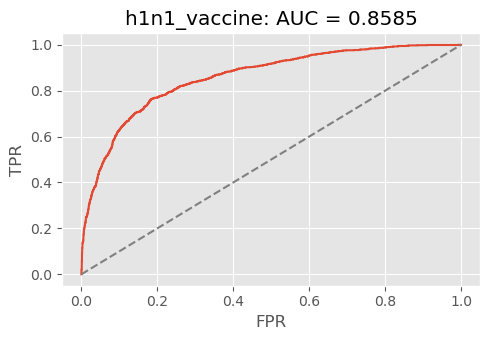

In [272]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3971  236]
 [ 585  550]]


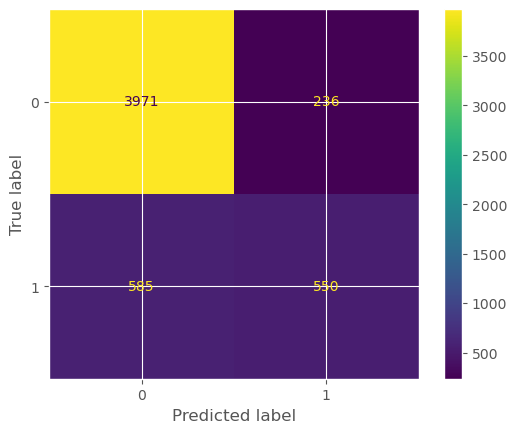

In [273]:
cm = confusion_matrix(y_eval_h1n1, preds_lr_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lr_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 2: RandomForest

In [274]:
estimator_rf_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [275]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rf_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rf_h1n1

array([[0.9377773 , 0.0622227 ],
       [0.50187195, 0.49812805],
       [0.9104864 , 0.0895136 ],
       ...,
       [0.94842652, 0.05157348],
       [0.71438912, 0.28561088],
       [0.63994231, 0.36005769]])

In [276]:
print_metrics(y_eval_h1n1, preds_rf_h1n1[:, 1].round())

Accuracy:     0.8429
Precision:     0.7960
Recall:     0.3507

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      4207
           1       0.80      0.35      0.49      1135

    accuracy                           0.84      5342
   macro avg       0.82      0.66      0.70      5342
weighted avg       0.84      0.84      0.82      5342



In [277]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_h1n1[:, 1]):.6f}")

AUC = 0.857541


In [278]:
y_preds_rf_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rf_h1n1.shape)
y_preds_rf_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.062223
1215,0.498128
10540,0.089514
7407,0.188101
14697,0.206136


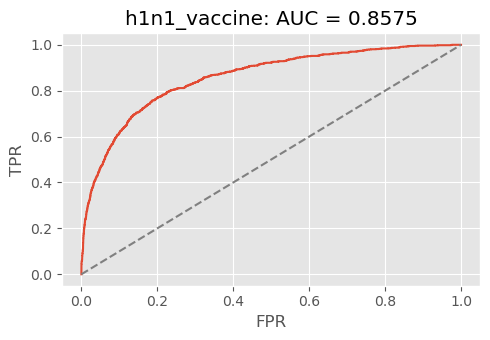

In [279]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rf_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4105  102]
 [ 737  398]]


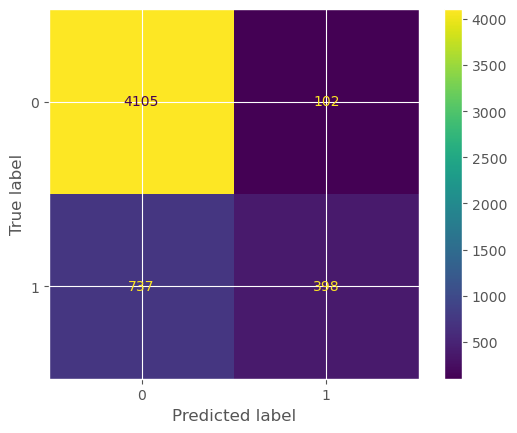

In [280]:
cm = confusion_matrix(y_eval_h1n1, preds_rf_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 3: SVM

In [281]:
estimator_svm_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [282]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_svm_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svm_h1n1

array([[0.95223957, 0.04776043],
       [0.64066621, 0.35933379],
       [0.90315463, 0.09684537],
       ...,
       [0.91059484, 0.08940516],
       [0.85882039, 0.14117961],
       [0.69975667, 0.30024333]])

In [283]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svm_h1n1[:, 1].round())

Accuracy:     0.8491
Precision:     0.7388
Recall:     0.4485

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4207
           1       0.74      0.45      0.56      1135

    accuracy                           0.85      5342
   macro avg       0.80      0.70      0.73      5342
weighted avg       0.84      0.85      0.83      5342



In [284]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_h1n1[:, 1]):.6f}")

AUC = 0.847230


In [285]:
y_preds_svm_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svm_h1n1.shape)
y_preds_svm_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.047760
1215,0.359334
10540,0.096845
7407,0.133966
14697,0.126239


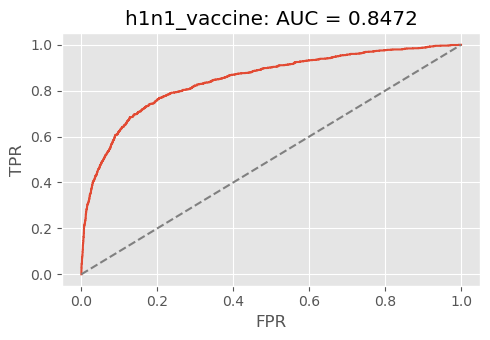

In [286]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4027  180]
 [ 626  509]]


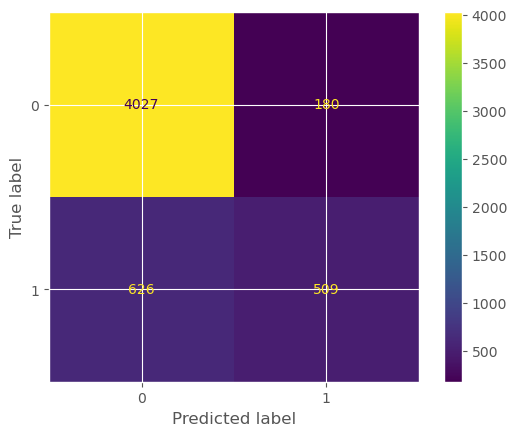

In [287]:
cm = confusion_matrix(y_eval_h1n1, preds_svm_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 4: RandomForest Balanced

In [288]:
estimator_rfb_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8,
                                   class_weight='balanced', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rfb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator'

In [289]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rfb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rfb_h1n1

array([[0.80941841, 0.19058159],
       [0.2469805 , 0.7530195 ],
       [0.74746079, 0.25253921],
       ...,
       [0.83491022, 0.16508978],
       [0.44259169, 0.55740831],
       [0.38553217, 0.61446783]])

In [290]:
print_metrics(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())

Accuracy:     0.8081
Precision:     0.5351
Recall:     0.7392

               precision    recall  f1-score   support

           0       0.92      0.83      0.87      4207
           1       0.54      0.74      0.62      1135

    accuracy                           0.81      5342
   macro avg       0.73      0.78      0.75      5342
weighted avg       0.84      0.81      0.82      5342



In [292]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rfb_h1n1[:, 1]):.6f}")

AUC = 0.858906


In [293]:
y_preds_rfb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rfb_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rfb_h1n1.shape)
y_preds_rfb_h1n1.head()

y_preds.shape: (5342, 1)


,h1n1_vaccine
respondent_id,
22317,0.190582
1215,0.753019
10540,0.252539
7407,0.421833
14697,0.448260


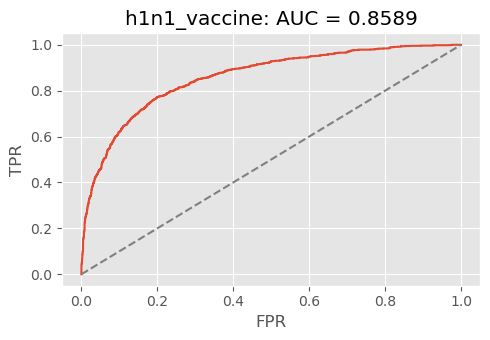

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rfb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[3478  729]
 [ 296  839]]


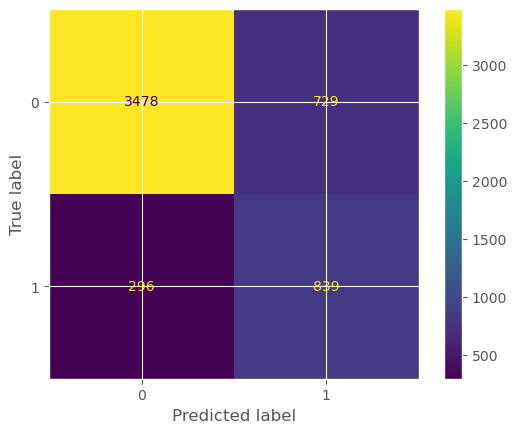

In [295]:
cm = confusion_matrix(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rfb_h1n1.classes_)
disp.plot()
plt.show()

## Seasonal

### Algoritmo 1: SVM

In [296]:
estimator_svm_seasonal = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [297]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_svm_seasonal = full_pipeline.predict_proba(X_eval)
preds_svm_seasonal

array([[0.60592632, 0.39407368],
       [0.16790878, 0.83209122],
       [0.83269921, 0.16730079],
       ...,
       [0.92811689, 0.07188311],
       [0.51466138, 0.48533862],
       [0.52097095, 0.47902905]])

In [298]:
print_metrics(y_eval_seasonal, preds_svm_seasonal[:, 1].round())

Accuracy:     0.7814
Precision:     0.7818
Recall:     0.7359

               precision    recall  f1-score   support

           0       0.78      0.82      0.80      2854
           1       0.78      0.74      0.76      2488

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [299]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_seasonal[:, 1]):.6f}")

AUC = 0.855371


In [300]:
y_preds_svm_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_svm_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_svm_seasonal.shape)
y_preds_svm_seasonal.head()

y_preds.shape: (5342, 1)


,seasonal_vaccine
respondent_id,
22317,0.394074
1215,0.832091
10540,0.167301
7407,0.199774
14697,0.220275


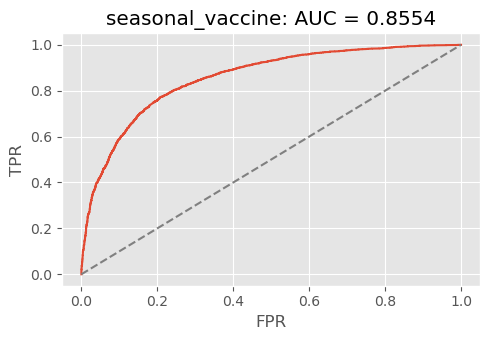

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_svm_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[2343  511]
 [ 657 1831]]


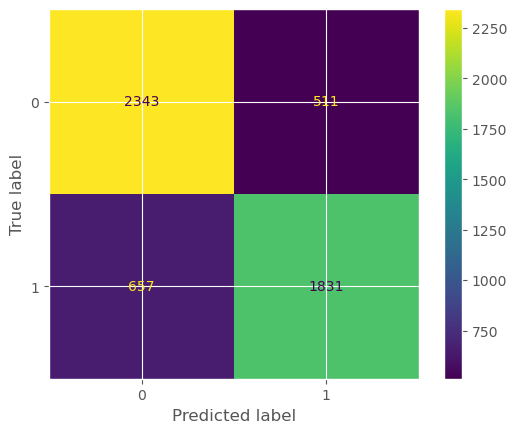

In [302]:
cm = confusion_matrix(y_eval_seasonal, preds_svm_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 2: RandomForest

In [303]:
estimator_rf_seasonal = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=8, criterion='entropy', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [304]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_rf_seasonal = full_pipeline.predict_proba(X_eval)
preds_rf_seasonal

array([[0.64936741, 0.35063259],
       [0.29563974, 0.70436026],
       [0.82538033, 0.17461967],
       ...,
       [0.76817547, 0.23182453],
       [0.3836507 , 0.6163493 ],
       [0.49005025, 0.50994975]])

In [305]:
print_metrics(y_eval_seasonal, preds_rf_seasonal[:, 1].round())

Accuracy:     0.7703
Precision:     0.7784
Recall:     0.7086

               precision    recall  f1-score   support

           0       0.76      0.82      0.79      2854
           1       0.78      0.71      0.74      2488

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



In [306]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_seasonal[:, 1]):.6f}")

AUC = 0.849570


In [307]:
y_preds_rf_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_rf_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_rf_seasonal.shape)
y_preds_rf_seasonal.head()

y_preds.shape: (5342, 1)


,seasonal_vaccine
respondent_id,
22317,0.350633
1215,0.704360
10540,0.174620
7407,0.395614
14697,0.390815


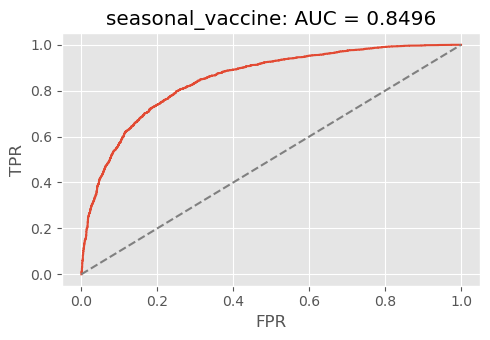

In [308]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_rf_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[2352  502]
 [ 725 1763]]


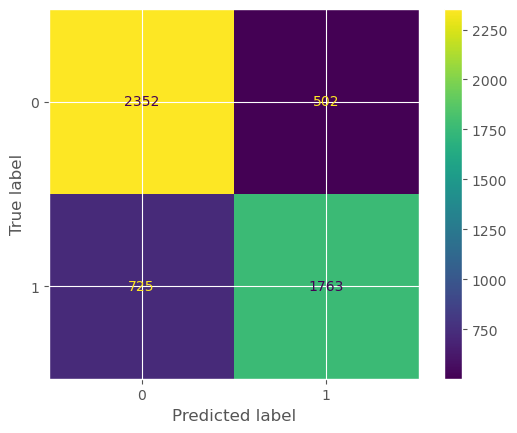

In [309]:
cm = confusion_matrix(y_eval_seasonal, preds_rf_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 3: KNeighbors

In [343]:
estimator_kn_seasonal = KNeighborsClassifier(n_neighbors=30)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_kn_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_sta

In [344]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_kn_seasonal = full_pipeline.predict_proba(X_eval)
preds_kn_seasonal

array([[0.8       , 0.2       ],
       [0.36666667, 0.63333333],
       [0.8       , 0.2       ],
       ...,
       [0.9       , 0.1       ],
       [0.43333333, 0.56666667],
       [0.5       , 0.5       ]])

In [345]:
print_metrics(y_eval_seasonal, preds_kn_seasonal[:, 1].round())

Accuracy:     0.7340
Precision:     0.7494
Recall:     0.6443

               precision    recall  f1-score   support

           0       0.72      0.81      0.77      2854
           1       0.75      0.64      0.69      2488

    accuracy                           0.73      5342
   macro avg       0.74      0.73      0.73      5342
weighted avg       0.74      0.73      0.73      5342



In [346]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_kn_seasonal[:, 1]):.6f}")

AUC = 0.806208


In [347]:
y_preds_kn_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_kn_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_kn_seasonal.shape)
y_preds_kn_seasonal.head()

y_preds.shape: (5342, 1)


,seasonal_vaccine
respondent_id,
22317,0.200000
1215,0.633333
10540,0.200000
7407,0.500000
14697,0.200000


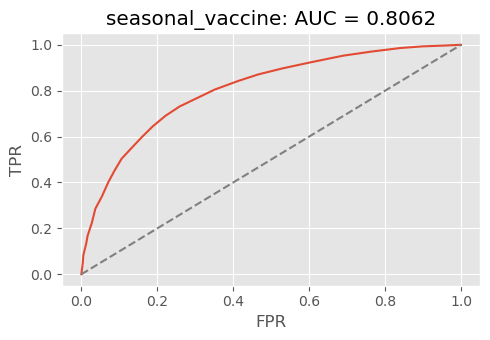

In [348]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_kn_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[2318  536]
 [ 885 1603]]


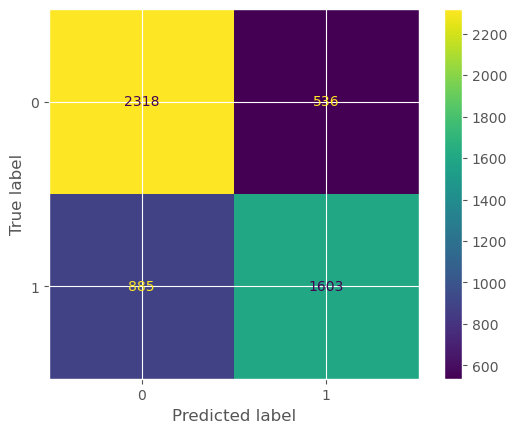

In [349]:
cm = confusion_matrix(y_eval_seasonal, preds_kn_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_kn_seasonal.classes_)
disp.plot()
plt.show()

## MultiOutputClassifier

### Algoritmo 1: Logistic Regression

In [157]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [158]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimators

In [159]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_lr_multi = full_pipeline.predict_proba(X_eval)
preds_lr_multi

[array([[0.98770674, 0.01229326],
        [0.53866649, 0.46133351],
        [0.90066045, 0.09933955],
        ...,
        [0.97877341, 0.02122659],
        [0.80617567, 0.19382433],
        [0.62049171, 0.37950829]]),
 array([[0.58708617, 0.41291383],
        [0.24182285, 0.75817715],
        [0.84213624, 0.15786376],
        ...,
        [0.90523155, 0.09476845],
        [0.46824025, 0.53175975],
        [0.58484367, 0.41515633]])]

In [160]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_multi[0][:, 1].round())

Accuracy:     0.8463
Precision:     0.6997
Recall:     0.4846

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      4207
           1       0.70      0.48      0.57      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [161]:
print_metrics(y_eval_seasonal, preds_lr_multi[1][:, 1].round())

Accuracy:     0.7791
Precision:     0.7762
Recall:     0.7387

               precision    recall  f1-score   support

           0       0.78      0.81      0.80      2854
           1       0.78      0.74      0.76      2488

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [162]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_multi[0][:, 1]):.6f}")

AUC = 0.8585236060


In [163]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_lr_multi[1][:, 1]):.6f}")

AUC = 0.8524030976


In [164]:
y_preds_lr_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_multi[0][:, 1],
        "seasonal_vaccine": preds_lr_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_lr_multi.shape)
y_preds_lr_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.012293,0.412914
1215,0.461334,0.758177
10540,0.099340,0.157864
7407,0.148404,0.163243
14697,0.194856,0.333376


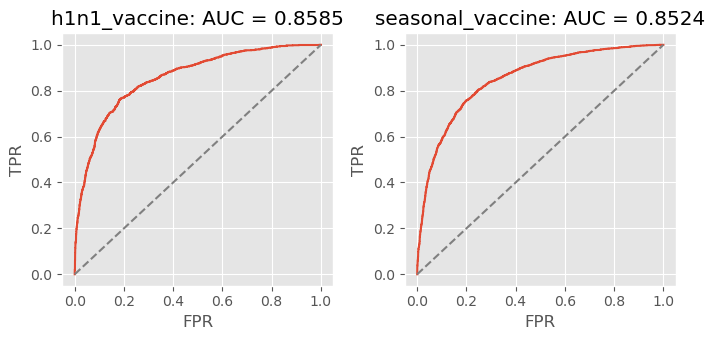

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_lr_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 2: Naive Bayes

In [166]:
estimators = MultiOutputClassifier(
    estimator=GaussianNB(var_smoothing=0.02848)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [167]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_naive_multi = full_pipeline.predict_proba(X_eval)
preds_naive_multi

[array([[9.99043482e-01, 9.56517777e-04],
        [2.12525316e-02, 9.78747468e-01],
        [9.98976668e-01, 1.02333172e-03],
        ...,
        [9.99872733e-01, 1.27267246e-04],
        [9.03577916e-01, 9.64220840e-02],
        [5.48115847e-02, 9.45188415e-01]]),
 array([[8.23823096e-01, 1.76176904e-01],
        [8.02187472e-04, 9.99197813e-01],
        [9.98345077e-01, 1.65492300e-03],
        ...,
        [9.71255262e-01, 2.87447380e-02],
        [3.29073391e-02, 9.67092661e-01],
        [3.53671748e-01, 6.46328252e-01]])]

In [168]:
print_metrics(y_eval_h1n1, preds_naive_multi[0][:, 1].round())

Accuracy:     0.7812
Precision:     0.4886
Recall:     0.6396

               precision    recall  f1-score   support

           0       0.89      0.82      0.86      4207
           1       0.49      0.64      0.55      1135

    accuracy                           0.78      5342
   macro avg       0.69      0.73      0.70      5342
weighted avg       0.81      0.78      0.79      5342



In [169]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_naive_multi[0][:, 1]):.6f}")

AUC = 0.8053866589


In [170]:
print_metrics(y_eval_seasonal, preds_naive_multi[1][:, 1].round())

Accuracy:     0.7276
Precision:     0.6938
Recall:     0.7432

               precision    recall  f1-score   support

           0       0.76      0.71      0.74      2854
           1       0.69      0.74      0.72      2488

    accuracy                           0.73      5342
   macro avg       0.73      0.73      0.73      5342
weighted avg       0.73      0.73      0.73      5342



In [171]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_naive_multi[1][:, 1]):.6f}")

AUC = 0.8019135156


In [172]:
y_preds_naive_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_naive_multi[0][:, 1],
        "seasonal_vaccine": preds_naive_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_naive_multi.shape)
y_preds_naive_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.000957,0.176177
1215,0.978747,0.999198
10540,0.001023,0.001655
7407,0.000052,0.000937
14697,0.002279,0.001749


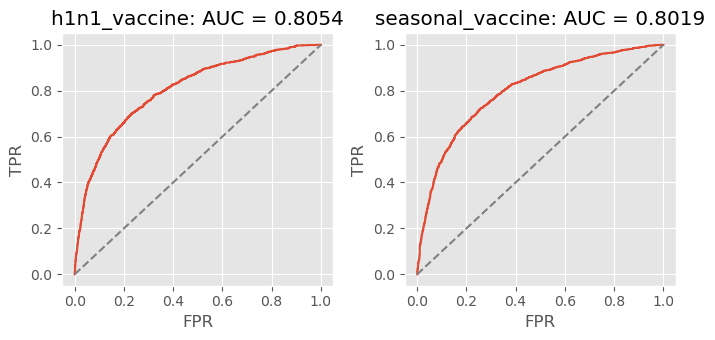

In [173]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_naive_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_naive_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 3: SVM

In [174]:
estimators = MultiOutputClassifier(
    estimator=SVC(C=1, gamma=0.01, kernel='rbf', probability=True)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1

In [175]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_svm_multi = full_pipeline.predict_proba(X_eval)
preds_svm_multi

[array([[0.95200388, 0.04799612],
        [0.64142987, 0.35857013],
        [0.90295805, 0.09704195],
        ...,
        [0.91038685, 0.08961315],
        [0.85872831, 0.14127169],
        [0.70029805, 0.29970195]]),
 array([[0.60544021, 0.39455979],
        [0.16823312, 0.83176688],
        [0.83205415, 0.16794585],
        ...,
        [0.92766949, 0.07233051],
        [0.51434268, 0.48565732],
        [0.52063894, 0.47936106]])]

In [176]:
print_metrics(y_eval_h1n1, preds_svm_multi[0][:, 1].round())

Accuracy:     0.8493
Precision:     0.7398
Recall:     0.4485

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4207
           1       0.74      0.45      0.56      1135

    accuracy                           0.85      5342
   macro avg       0.80      0.70      0.73      5342
weighted avg       0.84      0.85      0.83      5342



In [177]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_multi[0][:, 1]):.6f}")

AUC = 0.8472074547


In [178]:
print_metrics(y_eval_seasonal, preds_svm_multi[1][:, 1].round())

Accuracy:     0.7815
Precision:     0.7819
Recall:     0.7363

               precision    recall  f1-score   support

           0       0.78      0.82      0.80      2854
           1       0.78      0.74      0.76      2488

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [179]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_multi[1][:, 1]):.6f}")

AUC = 0.8553729239


In [180]:
y_preds_svm_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_multi[0][:, 1],
        "seasonal_vaccine": preds_svm_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_svm_multi.shape)
y_preds_svm_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.047996,0.394560
1215,0.358570,0.831767
10540,0.097042,0.167946
7407,0.134079,0.200439
14697,0.126373,0.220943


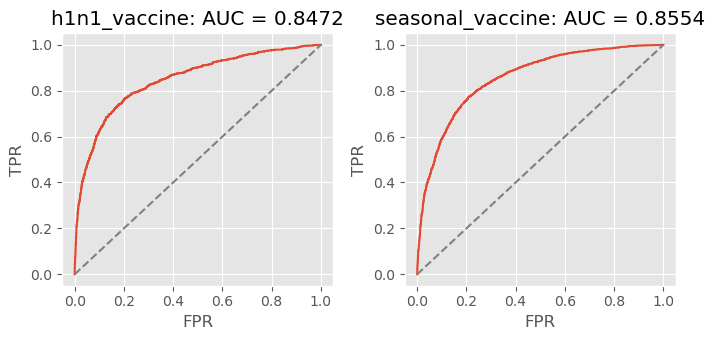

In [181]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_svm_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 4: RandomForest

In [183]:
estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimators

In [184]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_rf_multi = full_pipeline.predict_proba(X_eval)
preds_rf_multi

[array([[0.9377773 , 0.0622227 ],
        [0.50187195, 0.49812805],
        [0.9104864 , 0.0895136 ],
        ...,
        [0.94842652, 0.05157348],
        [0.71438912, 0.28561088],
        [0.63994231, 0.36005769]]),
 array([[0.64936741, 0.35063259],
        [0.29563974, 0.70436026],
        [0.82538033, 0.17461967],
        ...,
        [0.76817547, 0.23182453],
        [0.3836507 , 0.6163493 ],
        [0.49005025, 0.50994975]])]

In [185]:
print_metrics(y_eval_h1n1, preds_rf_multi[0][:, 1].round())

Accuracy:     0.8429
Precision:     0.7960
Recall:     0.3507

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      4207
           1       0.80      0.35      0.49      1135

    accuracy                           0.84      5342
   macro avg       0.82      0.66      0.70      5342
weighted avg       0.84      0.84      0.82      5342



In [186]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_multi[0][:, 1]):.6f}")

AUC = 0.8575409769


In [187]:
print_metrics(y_eval_seasonal, preds_rf_multi[1][:, 1].round())

Accuracy:     0.7703
Precision:     0.7784
Recall:     0.7086

               precision    recall  f1-score   support

           0       0.76      0.82      0.79      2854
           1       0.78      0.71      0.74      2488

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



In [188]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_multi[1][:, 1]):.6f}")

AUC = 0.8495701582


In [189]:
y_preds_rf_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_multi[0][:, 1],
        "seasonal_vaccine": preds_rf_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_rf_multi.shape)
y_preds_rf_multi.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.062223,0.350633
1215,0.498128,0.704360
10540,0.089514,0.174620
7407,0.188101,0.395614
14697,0.206136,0.390815


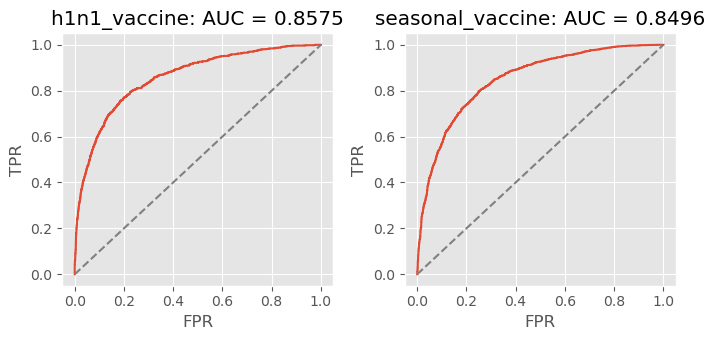

In [190]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_rf_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_rf_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()